# Customer Churn Binary Classification

In [47]:
#Importing Necessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier 
from sklearn import model_selection

#### Loading and Displaying data

In [3]:
df = pd.read_csv('Churn_Modelling.csv') 

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Statistical Summary of the Dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Clean Dataset 

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    10000
dtype: int64

In [9]:
#Dropping Irrelevant Features
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True) 
df.head()  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data = pd.concat([pd.get_dummies(df[['Gender','Geography']]),df[['Age','Balance','CreditScore','EstimatedSalary','Exited',
 'Gender','Geography','HasCrCard','IsActiveMember','NumOfProducts','Tenure']]],axis=1) 

In [11]:
data.head()

,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1,0,1,0,0,42,0.00,619,101348.88,1,Female,France,1,1,1,2
1,1,0,0,0,1,41,83807.86,608,112542.58,0,Female,Spain,0,1,1,1
2,1,0,1,0,0,42,159660.80,502,113931.57,1,Female,France,1,0,3,8
3,1,0,1,0,0,39,0.00,699,93826.63,0,Female,France,0,0,2,1
4,1,0,0,0,1,43,125510.82,850,79084.10,0,Female,Spain,1,1,1,2


In [12]:
data.drop(columns=['Gender','Geography'],inplace=True) 
data.head() 

,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age,Balance,CreditScore,EstimatedSalary,Exited,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1,0,1,0,0,42,0.00,619,101348.88,1,1,1,1,2
1,1,0,0,0,1,41,83807.86,608,112542.58,0,0,1,1,1
2,1,0,1,0,0,42,159660.80,502,113931.57,1,1,0,3,8
3,1,0,1,0,0,39,0.00,699,93826.63,0,0,0,2,1
4,1,0,0,0,1,43,125510.82,850,79084.10,0,1,1,1,2


In [13]:
df['Exited'].value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df['IsActiveMember'].value_counts() 

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [16]:
df['HasCrCard'].value_counts() 

1    7055
0    2945
Name: HasCrCard, dtype: int64

# Data Visualization

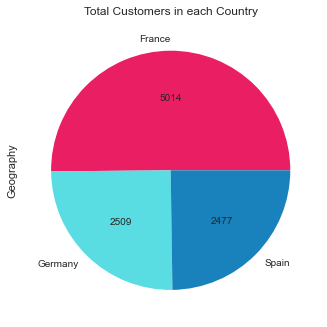

In [17]:
countries = df['Geography'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc']
plt.style.use('seaborn')
countries.plot.pie(autopct=lambda x: '{:.0f}'.format(x*countries.sum()/100), colors = colors )
plt.title('Total Customers in each Country');   


In [18]:
selectedCol=df[['Gender','Geography']]
selectedCol

,Gender,Geography
0,Female,France
1,Female,Spain
2,Female,France
3,Female,France
4,Female,Spain
...,...,...
9995,Male,France
9996,Male,France
9997,Female,France
9998,Male,Germany


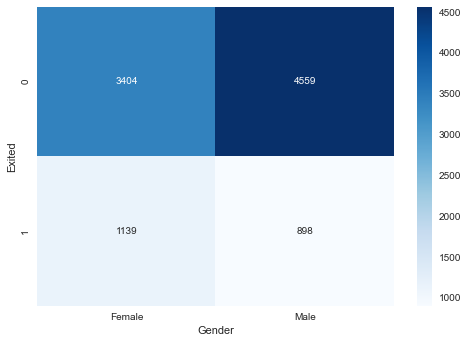

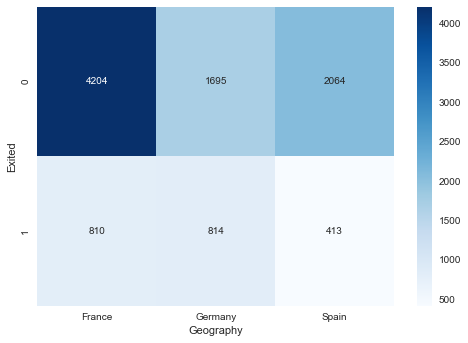

In [19]:
for col in selectedCol :
    plt.figure()
    sns.heatmap(pd.crosstab(df['Exited'], df[col]), annot = True, fmt = 'd',cmap="Blues");

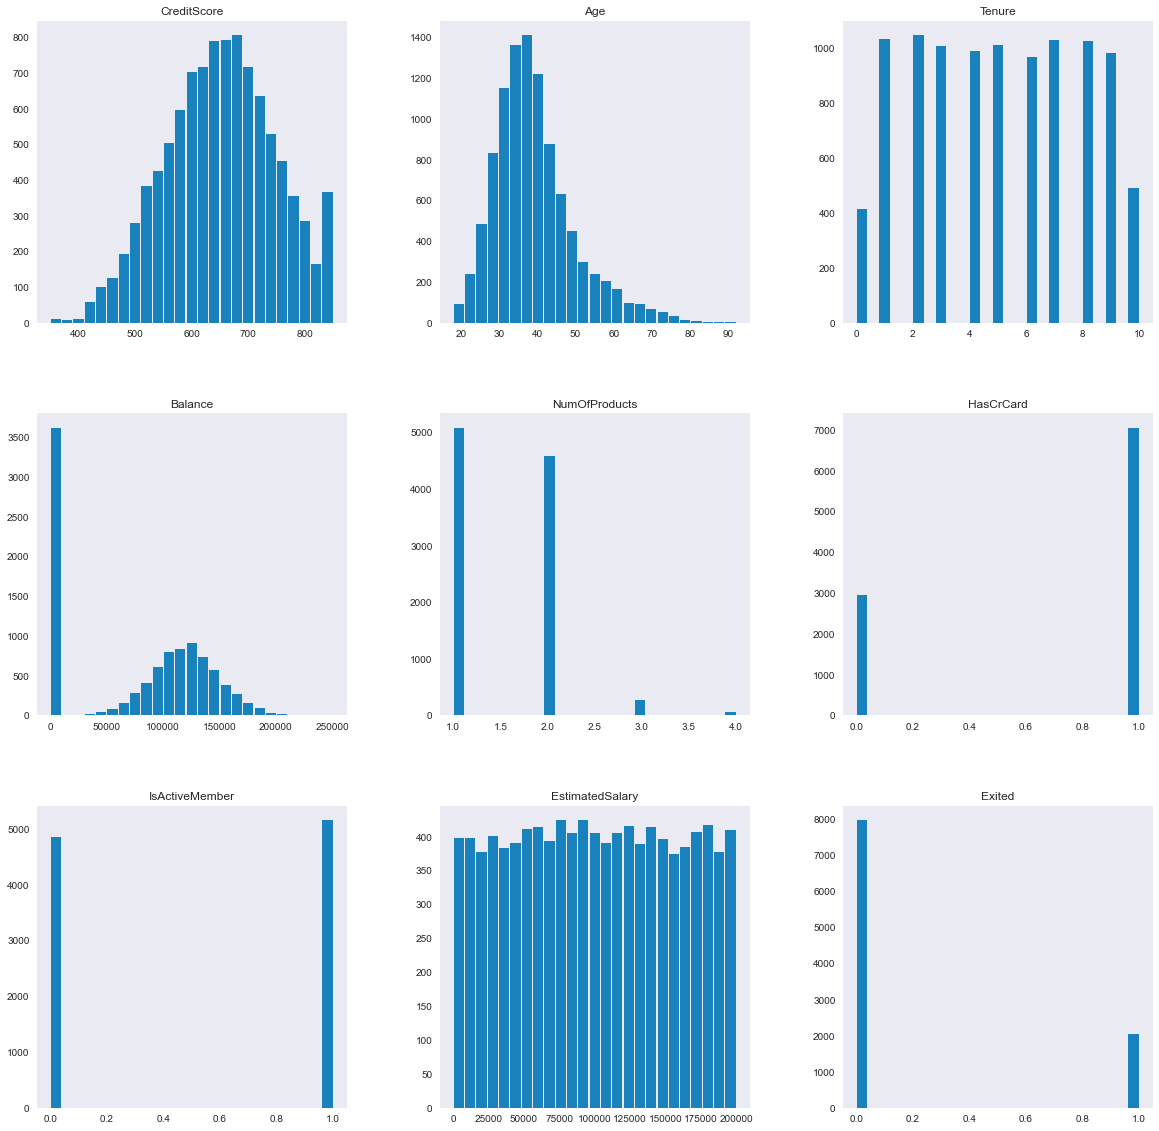

In [20]:
ax = df.hist(bins=25, grid=False, figsize=(20,20), color='#1982bc', zorder=2, rwidth=0.9) 

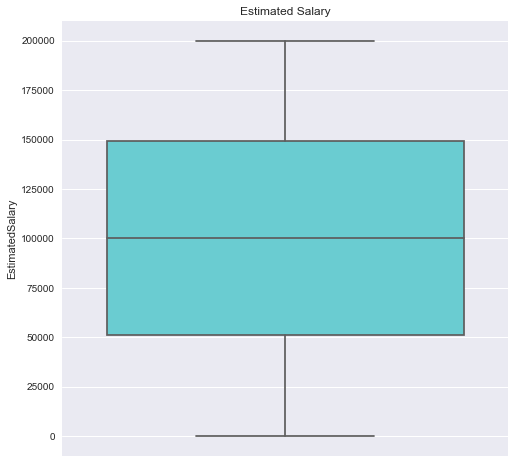

In [21]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(y=df["EstimatedSalary"],color='#59dce2')
plt.title("Estimated Salary")
plt.show()

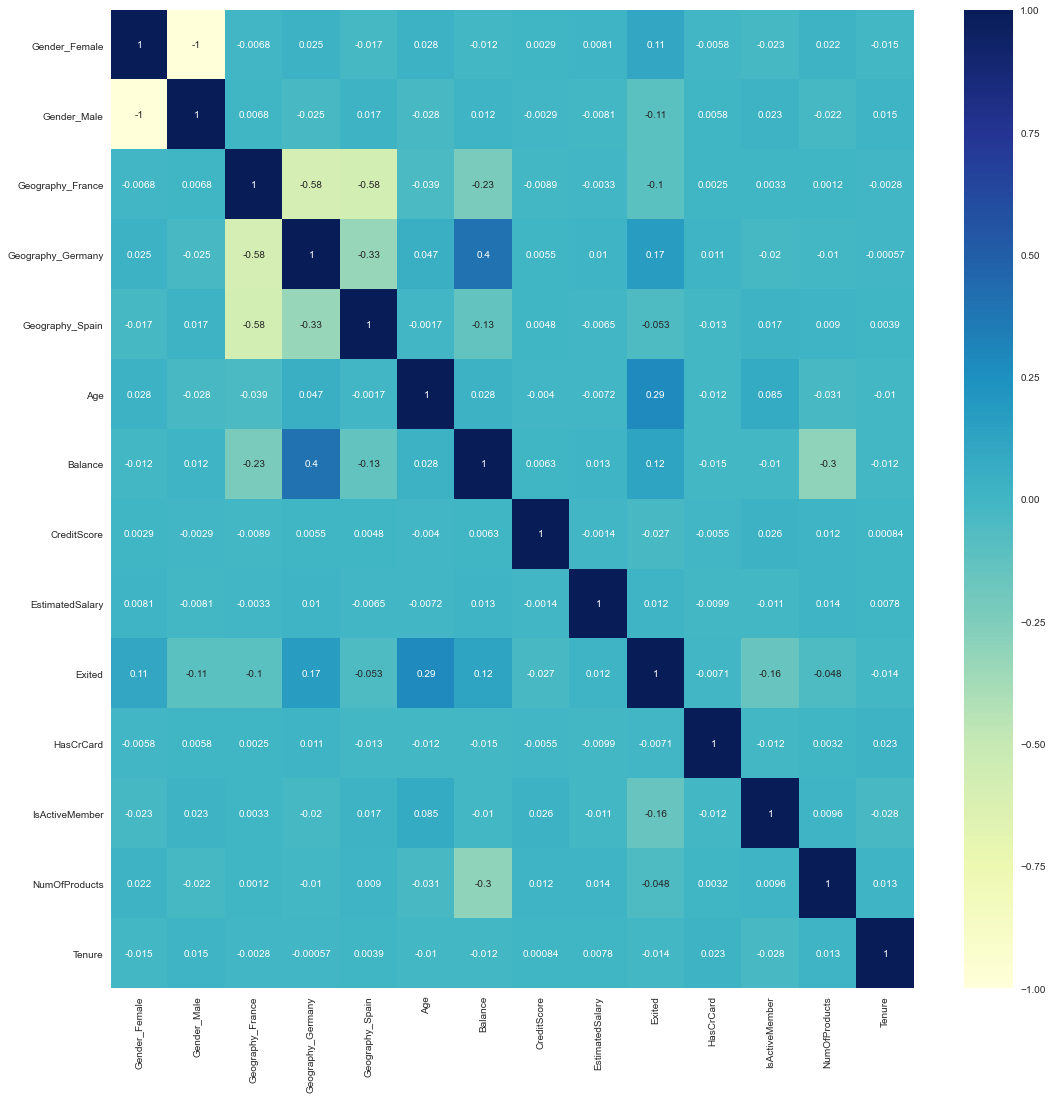

In [22]:
#Checking Correlation with Heatmap
corr = data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,cmap="YlGnBu", annot = True);

# Train-Test Datasets

In [23]:
data.columns

Index(['Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Age', 'Balance', 'CreditScore', 'EstimatedSalary',
       'Exited', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure'],
      dtype='object')

In [24]:
y = data['Exited']
X = data.drop('Exited', axis=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=.2, random_state=42) 

In [25]:
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)

Training Data has (8000, 13)
Testing Data has (2000, 13)


In [26]:
#data.drop[['Gender','Geography']] 
data.head()

,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age,Balance,CreditScore,EstimatedSalary,Exited,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1,0,1,0,0,42,0.00,619,101348.88,1,1,1,1,2
1,1,0,0,0,1,41,83807.86,608,112542.58,0,0,1,1,1
2,1,0,1,0,0,42,159660.80,502,113931.57,1,1,0,3,8
3,1,0,1,0,0,39,0.00,699,93826.63,0,0,0,2,1
4,1,0,0,0,1,43,125510.82,850,79084.10,0,1,1,1,2


# Bulding And Evaluating Classification Algorithms

In [27]:
#classification algorithms with dummy variables BASELINE
LR=LogisticRegression()
KNN=KNeighborsClassifier()
CART= DecisionTreeClassifier(random_state=42)
RF= RandomForestClassifier()

models=[('LR',LR), 
       ('KNN',KNN),
        ('CART', CART),
       ('RF',RF)]
results=[]
results2=[]
names=[]
for name, model in models:
    cv_result=model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_result2=model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    
    results.append(cv_result)
    results2.append(cv_result2)
    
    names.append(name)
    msg="%s: accuracy= %f , Recall= %f "%(name, np.mean(cv_result), np.mean(cv_result2))
    print(msg)  

LR: accuracy= 0.789125 , Recall= 0.048071 
KNN: accuracy= 0.766000 , Recall= 0.100976 
CART: accuracy= 0.787750 , Recall= 0.509708 
RF: accuracy= 0.861375 , Recall= 0.460436 


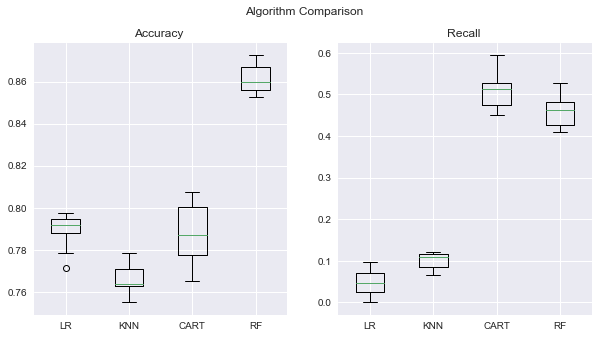

In [28]:
fig=plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')

ax= fig.add_subplot(121)
plt.title("Accuracy ")
plt.boxplot(results)
ax.set_xticklabels(names)

ax= fig.add_subplot(122)
plt.title("Recall ")
plt.boxplot(results2)
ax.set_xticklabels(names)
plt.show() 

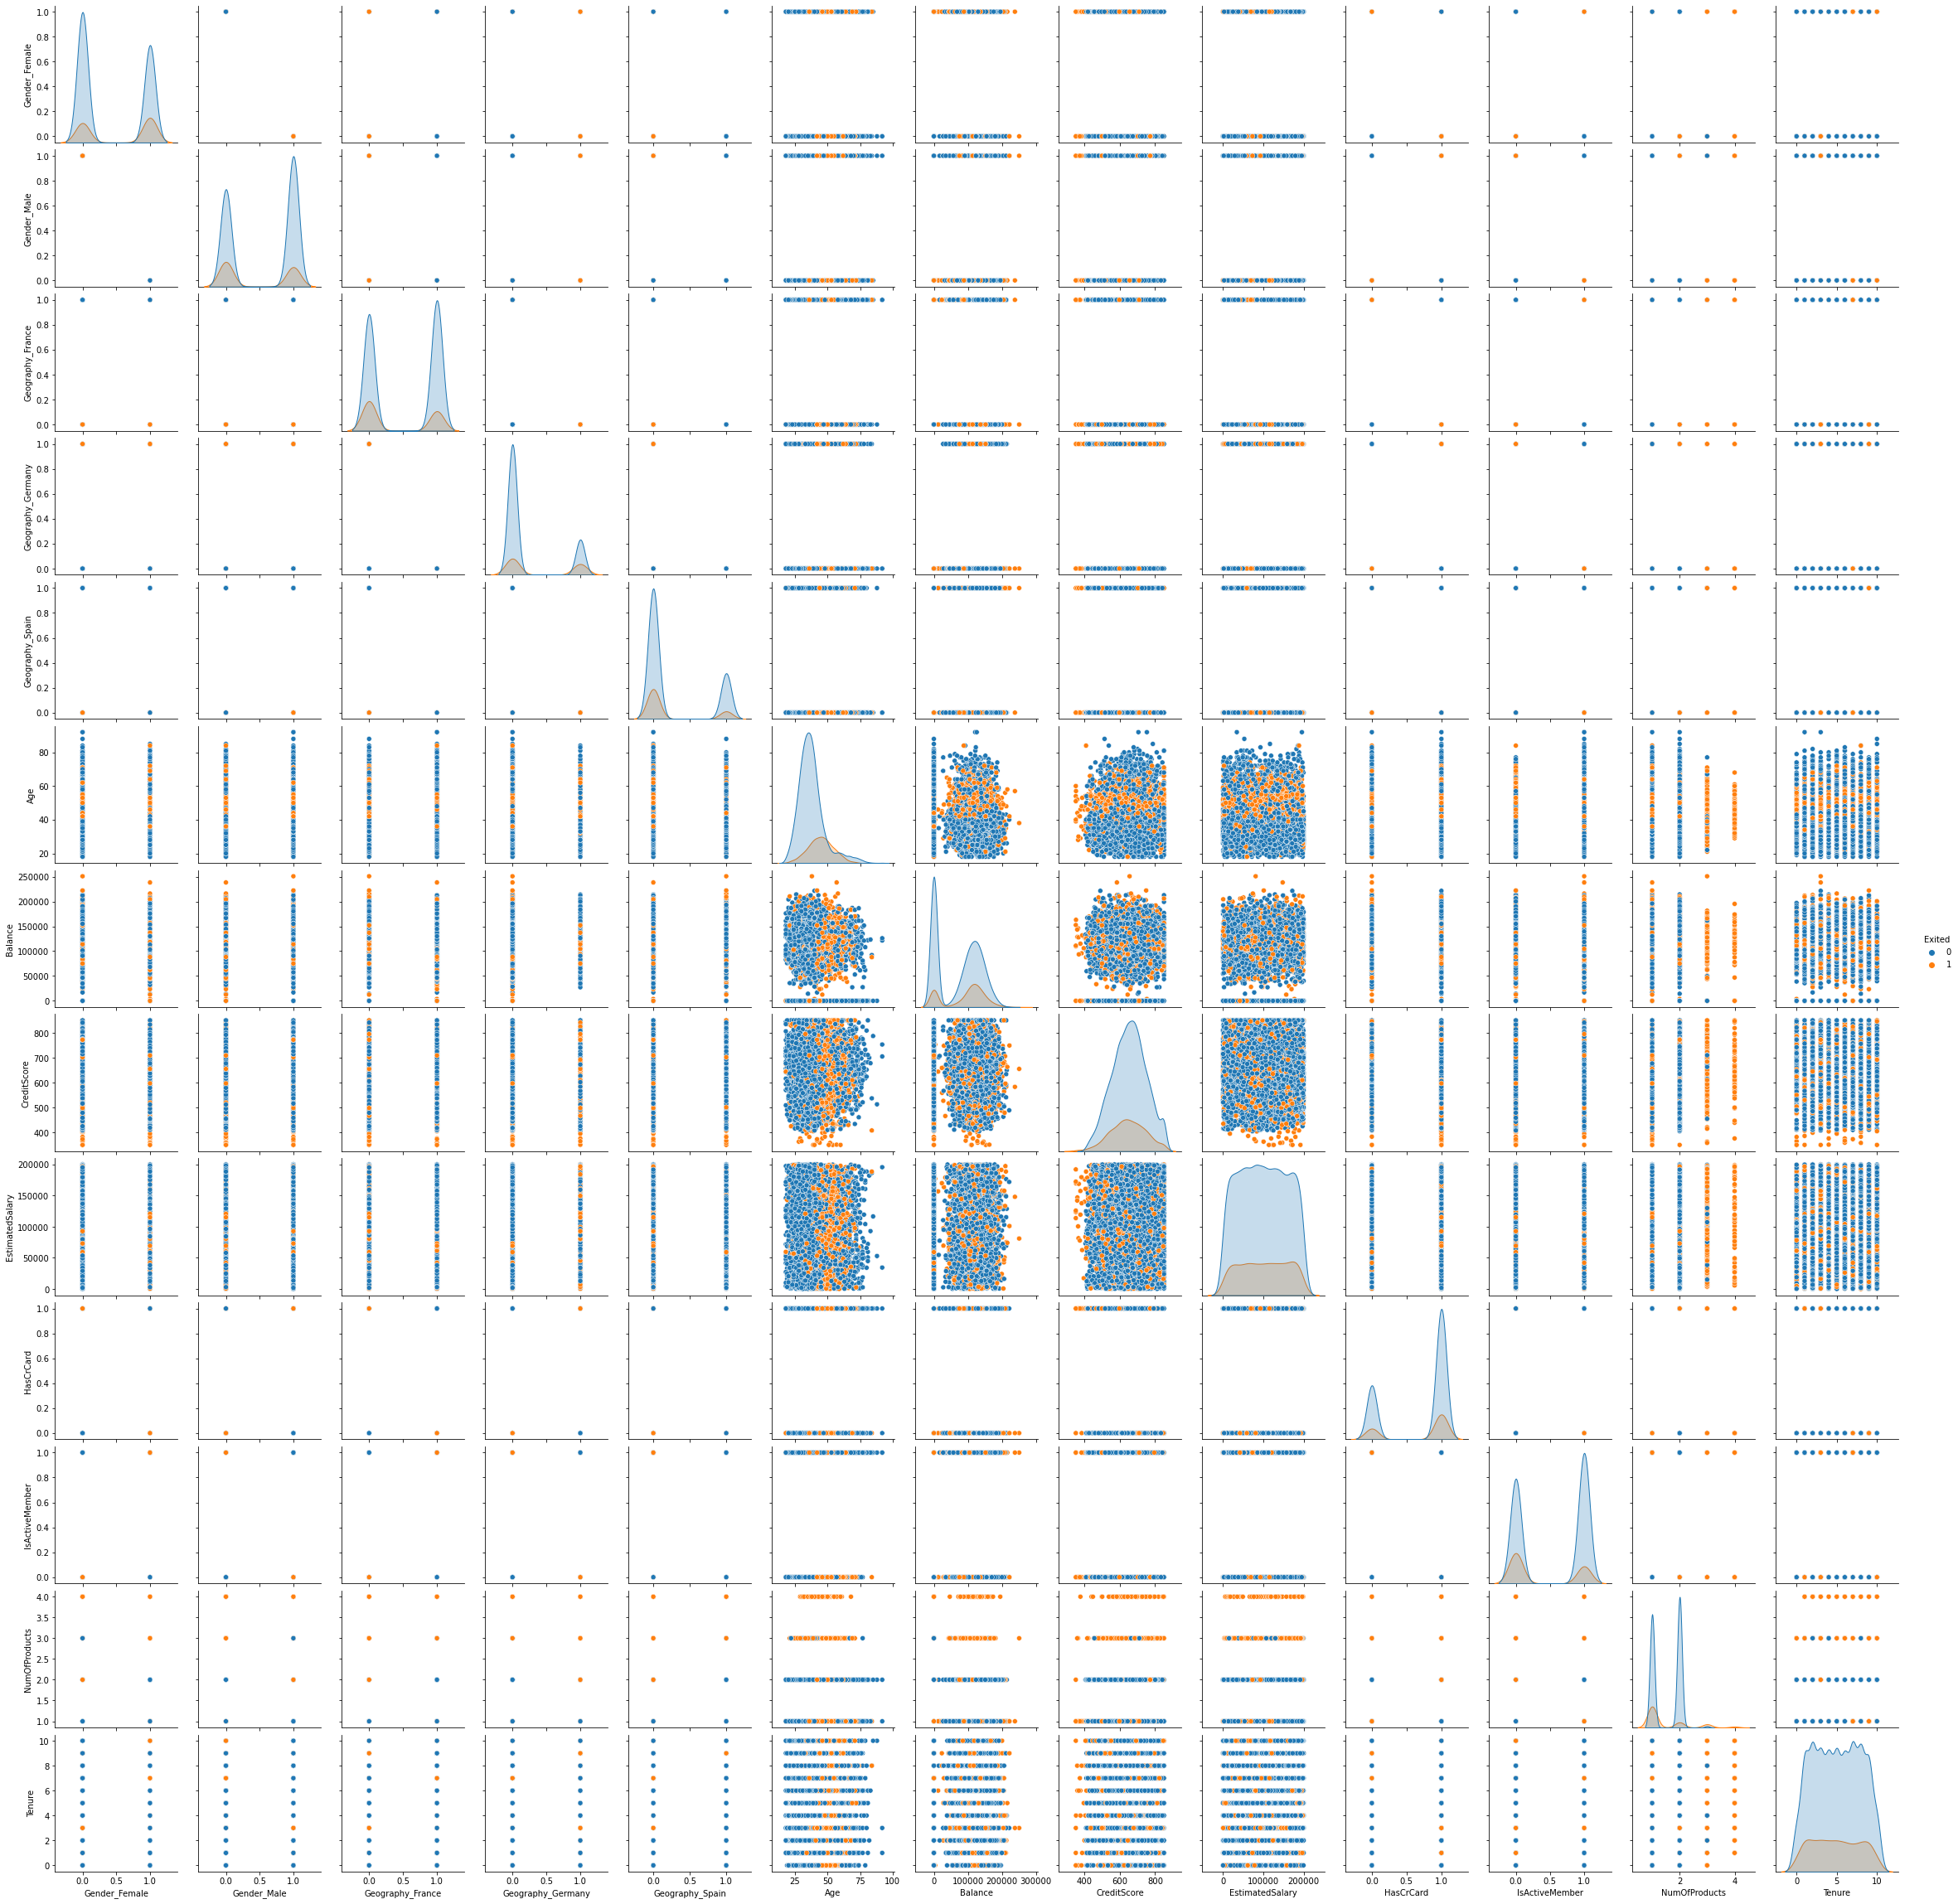

In [22]:
sns.pairplot(data, hue='Exited') 

First techniqe to handle imbalanced: Class weight

In [29]:
#, Test AUC: %.3f """, roc_auc_score(y_train, CART_x.predict_proba(X_test)[:,1]"""
for i in range(2,8):
    CART_x = DecisionTreeClassifier(class_weight={1 : i, 0 : 1},random_state=42)

    CART_x.fit(X_train, y_train)
    print(f'{i}:1 class weights CART Test Recall: %.3f , Test AUC: %.3f' % \
          (recall_score(y_test, CART_x.predict(X_test)), roc_auc_score(y_test, CART_x.predict_proba(X_test)[:,1])))
    print("....................")  

2:1 class weights CART Test Recall: 0.511 , Test AUC: 0.681
....................
3:1 class weights CART Test Recall: 0.491 , Test AUC: 0.678
....................
4:1 class weights CART Test Recall: 0.509 , Test AUC: 0.693
....................
5:1 class weights CART Test Recall: 0.491 , Test AUC: 0.685
....................
6:1 class weights CART Test Recall: 0.494 , Test AUC: 0.682
....................
7:1 class weights CART Test Recall: 0.481 , Test AUC: 0.678
....................


Second techniqe to handle imbalanced: oversamling 

In [31]:
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

#CART(solver='liblinear') 
CART.fit(X_train, y_train)

print('CART; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(y_test, CART.predict(X_test)), roc_auc_score(y_test, CART.predict_proba(X_test)[:,1]))) 

CART_os = CART 
CART_os.fit(X_tr_rs, y_tr_rs)

print('CART on Oversampled Train Data; Test recall: %.3f, Test AUC: %.3f' %  
      (recall_score(y_test, CART_os.predict(X_test)), roc_auc_score(y_test, CART_os.predict_proba(X_test)[:,1])))

CART; Test Recall: 0.506, Test AUC: 0.678
CART on Oversampled Train Data; Test recall: 0.501, Test AUC: 0.688


C:\Users\rose_\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (6576) in class 1 will be larger than the number of samples in the majority class (class #0 -> 6356)
  warnings.warn(


Tuned to select best parameter

In [32]:

from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [5, 6, 7, 8, 9,10,11,12],
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring = 'recall')

grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='recall', verbose=True)

In [33]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features='auto', random_state=42)

In [34]:
# Create Decision Tree classifer object
clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       random_state=42,class_weight={1 : 2, 0 : 1})

# Train Decision Tree Classifer
clf_tuned = clf_tuned.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_tuned.predict(X_test) 

In [35]:
from sklearn.metrics import classification_report 

In [36]:
print('Recall after tuned: ')
print(classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']) 

Recall after tuned: 
0.7208926911682508


 Feature Importance To select important features from cart model after using best parameter and best class weight

<AxesSubplot:title={'center':'Feature Importance'}>

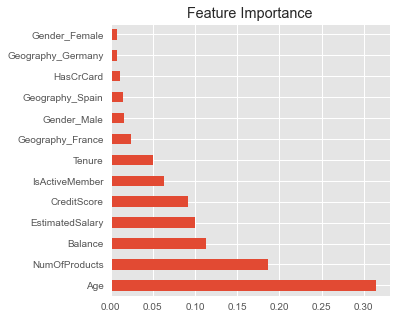

In [37]:
model= clf_tuned
model.fit(X_train, y_train)


plt.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance') 


In [38]:
X2=data[['NumOfProducts','Age','IsActiveMember','EstimatedSalary','Balance']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y,  test_size=.2, random_state=42) 

In [39]:
CART_FS = clf_tuned.fit(X_train2,y_train2)
y_pred2 = CART_FS.predict(X_test2) 

In [40]:
print('Recall after tuned and FS: ')
print(classification_report(y_test2, y_pred2, output_dict=True)['macro avg']['recall'])

Recall after tuned and FS: 
0.7319147622282286


# Best expermant

Feature importance + best CART parameter + best class weight + smote

In [41]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train2, y_train2)

CART_smote = clf_tuned 
CART_smote.fit(X_tr_smote, y_tr_smote)


print('CART on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(y_test2, CART_smote.predict(X_test2)), roc_auc_score(y_test2, CART_smote.predict_proba(X_test2)[:,1]) ))

CART on SMOTE Train Data; Test Recall: 0.791, Test AUC: 0.784


C:\Users\rose_\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (6576) in class 1 will be larger than the number of samples in the majority class (class #0 -> 6356)
  warnings.warn(


In [42]:
data.head() 

,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Age,Balance,CreditScore,EstimatedSalary,Exited,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1,0,1,0,0,42,0.00,619,101348.88,1,1,1,1,2
1,1,0,0,0,1,41,83807.86,608,112542.58,0,0,1,1,1
2,1,0,1,0,0,42,159660.80,502,113931.57,1,1,0,3,8
3,1,0,1,0,0,39,0.00,699,93826.63,0,0,0,2,1
4,1,0,0,0,1,43,125510.82,850,79084.10,0,1,1,1,2


In [43]:
CM = confusion_matrix(y_test2, CART_smote.predict(X_test2)) 
CM

array([[1069,  538],
       [  82,  311]], dtype=int64)

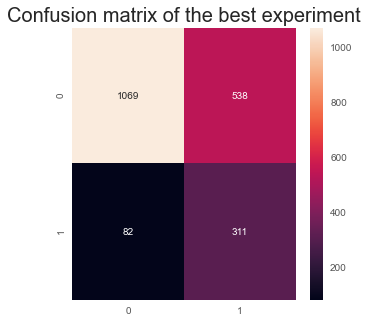

In [55]:
sns.heatmap(CM, annot = True, fmt='g')
plt.title("Confusion matrix of the best experiment", fontsize= 20);

In [49]:
tn,fp,fn,tp = confusion_matrix(y_test2,CART_smote.predict(X_test2)).ravel()
(tn,fp,fn,tp) 

(1069, 538, 82, 311)

In [44]:
recall_score(y_test2, CART_smote.predict(X_test2))

0.7913486005089059

As an experment, try stacking  

In [46]:
#from sklearn.ensemble import StackingClassifier

LR=LogisticRegression()
KNN=KNeighborsClassifier()
RF= RandomForestClassifier()

models1=[('KNN',KNN),
        ('CART', CART_smote),
       ('RF',RF)]

Stack_model=StackingClassifier(
estimators=models1, final_estimator= LogisticRegression()
)
Stack_model.fit(X_train2, y_train2)
y_train_pred2= Stack_model.predict(X_train2)
y_test_pred2=Stack_model.predict(X_test2)

Stack_model_train= recall_score(y_train2,y_train_pred2)

Stack_model_test= recall_score(y_test2,y_test_pred2)

print('Model performance for training set')
print('Recall: %f' %Stack_model_train)
print('Model performance for test set')
print('Recall: %f' %Stack_model_test) 

Model performance for training set
Recall: 0.909976
Model performance for test set
Recall: 0.417303
